In [63]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 합치기

In [21]:
api_key = '5750636e58796f6f36384e67724d4b'
file_type = 'json'
service_name = 'BukChonInOutPeopleInfo'
start = 1
end = 1000
all_data = pd.DataFrame()
for i in range(0, 30):
    url = f"http://openapi.seoul.go.kr:8088/{api_key}/{file_type}/{service_name}/{start}/{end}"
    resp = requests.get(url)
    data = resp.text
    dict_data = json.loads(data)
    df = pd.DataFrame(dict_data['BukChonInOutPeopleInfo']['row'])
    all_data = pd.concat([df,all_data])
    start += 1000
    end += 1000

     DEVICEID DEVICENAME DESCRIPTION            STARTTIME  \
0         1.0   율곡로3길 50      덕성여고 앞  2023-01-27 17:00:42   
1         2.0     계동길 69      계동교회 앞  2023-01-27 17:10:42   
2         1.0   율곡로3길 50      덕성여고 앞  2023-01-27 17:10:42   
3         2.0     계동길 69      계동교회 앞  2023-01-27 17:20:42   
4         1.0   율곡로3길 50      덕성여고 앞  2023-01-27 17:20:42   
..        ...        ...         ...                  ...   
995       2.0     계동길 69      계동교회 앞  2022-10-26 20:40:41   
996       1.0   율곡로3길 50      덕성여고 앞  2022-12-06 05:30:39   
997       4.0  북촌로5가길 38   삼청파출소 사잇길  2022-10-26 20:50:41   
998       2.0     계동길 69      계동교회 앞  2022-10-26 20:50:41   
999       2.0     계동길 69      계동교회 앞  2022-12-06 14:20:40   

                 ENDTIME  INCOUNT  OUTCOUNT  
0    2023-01-27 17:10:42   4171.0    2657.0  
1    2023-01-27 17:20:42   4939.0    7247.0  
2    2023-01-27 17:20:42   4286.0    2745.0  
3    2023-01-27 17:30:42   4983.0    7321.0  
4    2023-01-27 17:30:42   4375.0    

In [22]:
all_data.reset_index(drop = True, inplace = True)
all_data

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:00:42,2023-01-27 17:10:42,4171.0,2657.0
1,2.0,계동길 69,계동교회 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4939.0,7247.0
2,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4286.0,2745.0
3,2.0,계동길 69,계동교회 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4983.0,7321.0
4,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4375.0,2851.0
...,...,...,...,...,...,...,...
29308,2.0,계동길 69,계동교회 앞,2022-10-26 20:40:41,2022-10-26 20:50:41,21060.0,21995.0
29309,1.0,율곡로3길 50,덕성여고 앞,2022-12-06 05:30:39,2022-12-06 05:40:39,318.0,93.0
29310,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-26 20:50:41,2022-10-26 21:00:41,4674.0,5407.0
29311,2.0,계동길 69,계동교회 앞,2022-10-26 20:50:41,2022-10-26 21:00:41,21112.0,22056.0


# 유입(INCOUNT)가 가장 많은 지역

In [50]:
cctv_df = all_data
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:00:42,2023-01-27 17:10:42,4171.0,2657.0
1,2.0,계동길 69,계동교회 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4939.0,7247.0
2,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4286.0,2745.0
3,2.0,계동길 69,계동교회 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4983.0,7321.0
4,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4375.0,2851.0
...,...,...,...,...,...,...,...
29308,2.0,계동길 69,계동교회 앞,2022-10-26 20:40:41,2022-10-26 20:50:41,21060.0,21995.0
29309,1.0,율곡로3길 50,덕성여고 앞,2022-12-06 05:30:39,2022-12-06 05:40:39,318.0,93.0
29310,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-26 20:50:41,2022-10-26 21:00:41,4674.0,5407.0
29311,2.0,계동길 69,계동교회 앞,2022-10-26 20:50:41,2022-10-26 21:00:41,21112.0,22056.0


In [51]:
cctv_df['DESCRIPTION'].value_counts()

계동교회 앞       13701
덕성여고 앞       11753
삼청파출소 사잇길     3859
Name: DESCRIPTION, dtype: int64

In [131]:
max_incount = cctv_df.groupby('DESCRIPTION')['INCOUNT','OUTCOUNT'].mean()
max_incount

<ipython-input-131-f142ced7bcc5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_incount = cctv_df.groupby('DESCRIPTION')['INCOUNT','OUTCOUNT'].mean()


,INCOUNT,OUTCOUNT
DESCRIPTION,,
계동교회 앞,4987.611780,6167.678272
덕성여고 앞,2799.807113,2083.146516
삼청파출소 사잇길,1890.321068,2277.976160


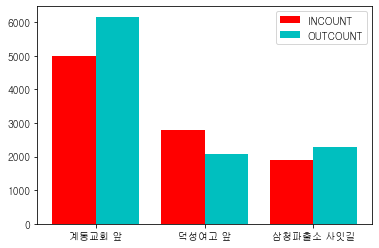

In [132]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
bar_width = 0.4
label = ['계동교회 앞','덕성여고 앞','삼청파출소 사잇길']
index = np.arange(len(label))
plt.bar(index, max_incount['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, max_incount['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.legend()
plt.xticks(index+0.2, label)
plt.show()

# 어떤 때(시간)에 사람이 많은가 (월/ 시간) (유입-유출)

In [128]:
cctv_df['ENDTIME'] = pd.to_datetime(cctv_df['ENDTIME'])
cctv_df['MONTH'] = cctv_df['ENDTIME'].dt.month
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,TOTAL,HOUR,WEEKDAY
0,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:00:42,2023-01-27 17:10:42,4171.0,2657.0,1,6828.0,17,4
1,2.0,계동길 69,계동교회 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4939.0,7247.0,1,12186.0,17,4
2,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4286.0,2745.0,1,7031.0,17,4
3,2.0,계동길 69,계동교회 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4983.0,7321.0,1,12304.0,17,4
4,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4375.0,2851.0,1,7226.0,17,4
...,...,...,...,...,...,...,...,...,...,...,...
29308,2.0,계동길 69,계동교회 앞,2022-10-26 20:40:41,2022-10-26 20:50:41,21060.0,21995.0,10,43055.0,20,2
29309,1.0,율곡로3길 50,덕성여고 앞,2022-12-06 05:30:39,2022-12-06 05:40:39,318.0,93.0,12,411.0,5,1
29310,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-26 20:50:41,2022-10-26 21:00:41,4674.0,5407.0,10,10081.0,21,2
29311,2.0,계동길 69,계동교회 앞,2022-10-26 20:50:41,2022-10-26 21:00:41,21112.0,22056.0,10,43168.0,21,2


In [129]:
count_MaxMin = cctv_df.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].mean()
count_MaxMin

<ipython-input-129-8d5f75f447b8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_MaxMin = cctv_df.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].max()


,INCOUNT,OUTCOUNT
MONTH,,
1,12025.0,13592.0
10,22344.0,24564.0
11,25507.0,29223.0
12,11469.0,15301.0


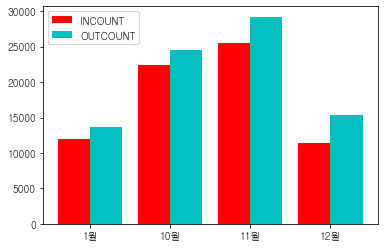

In [130]:
bar_width = 0.4
label = ['1월','10월','11월','12월']
index = np.arange(len(label))
plt.bar(index, count_MaxMin['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, count_MaxMin['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, label)
plt.legend()
plt.show()

# 장소별 있는 인구 최댓값

In [136]:
cctv_df['TOTAL'] = cctv_df['INCOUNT'] + cctv_df['OUTCOUNT']
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,TOTAL,HOUR,WEEKDAY
0,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:00:42,2023-01-27 17:10:42,4171.0,2657.0,1,6828.0,17,4
1,2.0,계동길 69,계동교회 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4939.0,7247.0,1,12186.0,17,4
2,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4286.0,2745.0,1,7031.0,17,4
3,2.0,계동길 69,계동교회 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4983.0,7321.0,1,12304.0,17,4
4,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4375.0,2851.0,1,7226.0,17,4
...,...,...,...,...,...,...,...,...,...,...,...
29308,2.0,계동길 69,계동교회 앞,2022-10-26 20:40:41,2022-10-26 20:50:41,21060.0,21995.0,10,43055.0,20,2
29309,1.0,율곡로3길 50,덕성여고 앞,2022-12-06 05:30:39,2022-12-06 05:40:39,318.0,93.0,12,411.0,5,1
29310,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-26 20:50:41,2022-10-26 21:00:41,4674.0,5407.0,10,10081.0,21,2
29311,2.0,계동길 69,계동교회 앞,2022-10-26 20:50:41,2022-10-26 21:00:41,21112.0,22056.0,10,43168.0,21,2


In [137]:
count_totalMax = cctv_df.groupby(['DESCRIPTION'])['TOTAL'].max()
count_totalMax

DESCRIPTION
계동교회 앞       54730.0
덕성여고 앞       24402.0
삼청파출소 사잇길    21006.0
Name: TOTAL, dtype: float64

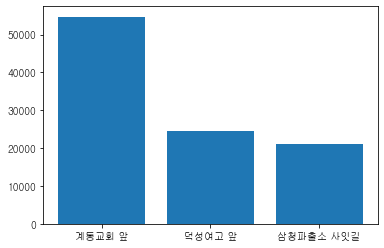

In [138]:
label = ['계동교회 앞','덕성여고 앞','삼청파출소 사잇길']
plt.bar(label,count_totalMax)
plt.show()

# 월별 최대 인구 수

In [139]:
Mcount_totalMax = cctv_df.groupby(['MONTH'])['TOTAL'].max()
Mcount_totalMax

MONTH
1     25617.0
10    46848.0
11    54730.0
12    26224.0
Name: TOTAL, dtype: float64

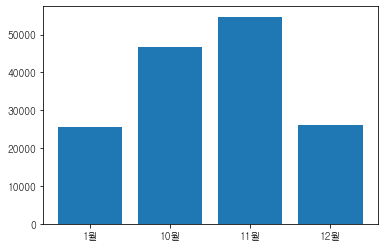

In [140]:
label = ['1월','10월','11월','12월']
plt.bar(label,Mcount_totalMax)
plt.show()

# 월별 평균 인구수

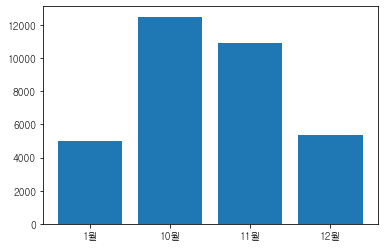

In [133]:
Mcount_totalmean = cctv_df.groupby(['MONTH'])['TOTAL'].mean()
Mcount_totalmean
label = ['1월','10월','11월','12월']
plt.bar(label,Mcount_totalmean)
plt.show()

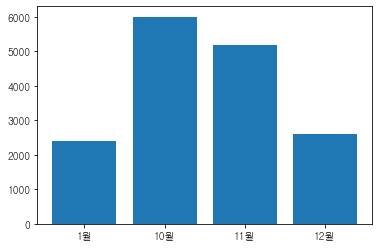

In [97]:
Mcount_incountmean = cctv_df.groupby(['MONTH'])['INCOUNT'].mean()
Mcount_incountmean
label = ['1월','10월','11월','12월']
plt.bar(label,Mcount_incountmean)
plt.show()

# 시간대별 분포

In [101]:
cctv_df['HOUR'] = cctv_df['ENDTIME'].dt.hour
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,TOTAL,HOUR
0,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:00:42,2023-01-27 17:10:42,4171.0,2657.0,1,6828.0,17
1,2.0,계동길 69,계동교회 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4939.0,7247.0,1,12186.0,17
2,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4286.0,2745.0,1,7031.0,17
3,2.0,계동길 69,계동교회 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4983.0,7321.0,1,12304.0,17
4,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4375.0,2851.0,1,7226.0,17
...,...,...,...,...,...,...,...,...,...,...
29308,2.0,계동길 69,계동교회 앞,2022-10-26 20:40:41,2022-10-26 20:50:41,21060.0,21995.0,10,43055.0,20
29309,1.0,율곡로3길 50,덕성여고 앞,2022-12-06 05:30:39,2022-12-06 05:40:39,318.0,93.0,12,411.0,5
29310,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-26 20:50:41,2022-10-26 21:00:41,4674.0,5407.0,10,10081.0,21
29311,2.0,계동길 69,계동교회 앞,2022-10-26 20:50:41,2022-10-26 21:00:41,21112.0,22056.0,10,43168.0,21


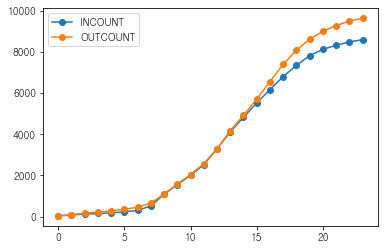

In [99]:
Hcount_IncountMean = cctv_df.groupby(['HOUR'])['INCOUNT'].mean()
Hcount_OutcountMean = cctv_df.groupby(['HOUR'])['OUTCOUNT'].mean()
hours = np.arange(0, 24)
plt.plot(hours,Hcount_IncountMean, marker = 'o')
plt.plot(hours, Hcount_OutcountMean, marker = 'o')
plt.legend(['INCOUNT','OUTCOUNT'])
plt.show()

# 요일별 유동인구

In [105]:
cctv_df['ENDTIME'] = pd.to_datetime(cctv_df['ENDTIME'])
cctv_df['WEEKDAY'] = cctv_df['ENDTIME'].dt.weekday
cctv_df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,TOTAL,HOUR,WEEKDAY
0,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:00:42,2023-01-27 17:10:42,4171.0,2657.0,1,6828.0,17,4
1,2.0,계동길 69,계동교회 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4939.0,7247.0,1,12186.0,17,4
2,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4286.0,2745.0,1,7031.0,17,4
3,2.0,계동길 69,계동교회 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4983.0,7321.0,1,12304.0,17,4
4,1.0,율곡로3길 50,덕성여고 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4375.0,2851.0,1,7226.0,17,4
...,...,...,...,...,...,...,...,...,...,...,...
29308,2.0,계동길 69,계동교회 앞,2022-10-26 20:40:41,2022-10-26 20:50:41,21060.0,21995.0,10,43055.0,20,2
29309,1.0,율곡로3길 50,덕성여고 앞,2022-12-06 05:30:39,2022-12-06 05:40:39,318.0,93.0,12,411.0,5,1
29310,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-26 20:50:41,2022-10-26 21:00:41,4674.0,5407.0,10,10081.0,21,2
29311,2.0,계동길 69,계동교회 앞,2022-10-26 20:50:41,2022-10-26 21:00:41,21112.0,22056.0,10,43168.0,21,2


<ipython-input-112-ef3995b6eff1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Wcount_countMean = cctv_df.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()


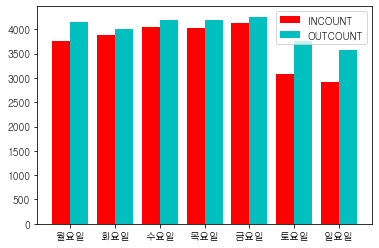

In [112]:
Wcount_countMean = cctv_df.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()
bar_width = 0.4
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Wcount_countMean['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Wcount_countMean['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, days)
plt.legend()
plt.show()

In [122]:
Wcount_countMinMax = cctv_df.groupby(['WEEKDAY'])['TOTAL'].max()
Wcount_countMinMax

WEEKDAY
0    46936.0
1    48714.0
2    54730.0
3    49032.0
4    46834.0
5    44065.0
6    46841.0
Name: TOTAL, dtype: float64

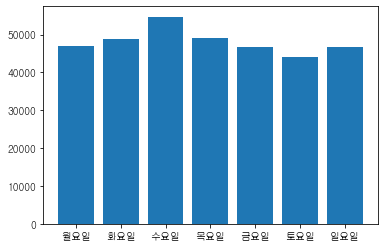

In [123]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Wcount_countMinMax)
plt.xticks(index, days)
plt.show()

# 계동교회 앞 월별 & 시간별 & 요일별

In [147]:
G_chruch = cctv_df.loc[cctv_df['DESCRIPTION'] == '계동교회 앞',:]
G_chruch

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,TOTAL,HOUR,WEEKDAY
1,2.0,계동길 69,계동교회 앞,2023-01-27 17:10:42,2023-01-27 17:20:42,4939.0,7247.0,1,12186.0,17,4
3,2.0,계동길 69,계동교회 앞,2023-01-27 17:20:42,2023-01-27 17:30:42,4983.0,7321.0,1,12304.0,17,4
5,2.0,계동길 69,계동교회 앞,2023-01-27 17:30:42,2023-01-27 17:40:42,5023.0,7375.0,1,12398.0,17,4
7,2.0,계동길 69,계동교회 앞,2023-01-27 17:40:42,2023-01-27 17:50:42,5047.0,7462.0,1,12509.0,17,4
9,2.0,계동길 69,계동교회 앞,2023-01-27 17:50:42,2023-01-27 18:00:42,5093.0,7490.0,1,12583.0,18,4
...,...,...,...,...,...,...,...,...,...,...,...
29305,2.0,계동길 69,계동교회 앞,2022-10-26 20:30:41,2022-10-26 20:40:41,21017.0,21910.0,10,42927.0,20,2
29306,2.0,계동길 69,계동교회 앞,2022-12-06 05:30:39,2022-12-06 05:40:39,144.0,396.0,12,540.0,5,1
29308,2.0,계동길 69,계동교회 앞,2022-10-26 20:40:41,2022-10-26 20:50:41,21060.0,21995.0,10,43055.0,20,2
29311,2.0,계동길 69,계동교회 앞,2022-10-26 20:50:41,2022-10-26 21:00:41,21112.0,22056.0,10,43168.0,21,2


<ipython-input-148-2e57532b2989>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Gcount_countMean = G_chruch.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()


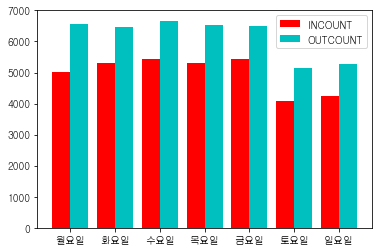

In [148]:
Gcount_countMean = G_chruch.groupby(['WEEKDAY'])['INCOUNT','OUTCOUNT'].mean()
bar_width = 0.4
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
index = np.arange(len(days))
plt.bar(index, Gcount_countMean['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_countMean['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, days)
plt.legend()
plt.show()

<ipython-input-149-aeff09e64d6b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Gcount_MaxMin = G_chruch.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].mean()


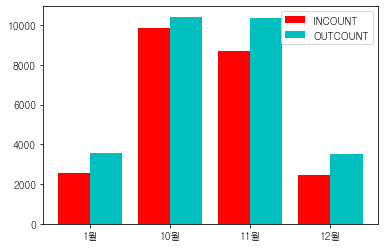

In [149]:
Gcount_MaxMin = G_chruch.groupby(['MONTH'])['INCOUNT', 'OUTCOUNT'].mean()
bar_width = 0.4
label = ['1월','10월','11월','12월']
index = np.arange(len(label))
plt.bar(index, Gcount_MaxMin['INCOUNT'], color ='r', width = bar_width, label = 'INCOUNT')
plt.bar(index + bar_width, Gcount_MaxMin['OUTCOUNT'], color = 'c',width = bar_width, label = 'OUTCOUNT')
plt.xticks(index+0.2, label)
plt.legend()
plt.show()

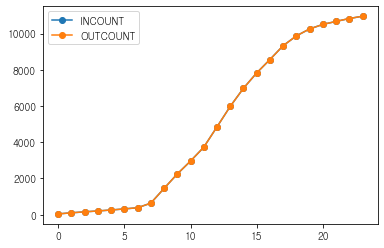

In [150]:
Gcount_IncountMean = G_chruch.groupby(['HOUR'])['INCOUNT'].mean()
Gcount_OutcountMean = G_chruch.groupby(['HOUR'])['OUTCOUNT'].mean()
hours = np.arange(0, 24)
plt.plot(hours,Gcount_IncountMean, marker = 'o')
plt.plot(hours, Gcount_IncountMean, marker = 'o')
plt.legend(['INCOUNT','OUTCOUNT'])
plt.show()